In [1]:
!pip3 install torchvision

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

In [3]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))
                              ])
training_datasets = datasets.MNIST(root = './data', train = True,download = True, transform = transform)
validation_datasets = datasets.MNIST(root = './data', train = False,download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(dataset=training_datasets,batch_size = 100,shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_datasets,batch_size = 100,shuffle = False)

In [4]:
training_datasets

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [5]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  print(image.shape)
  image = image.squeeze()
  image = image.clip(0,1)
  return image

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


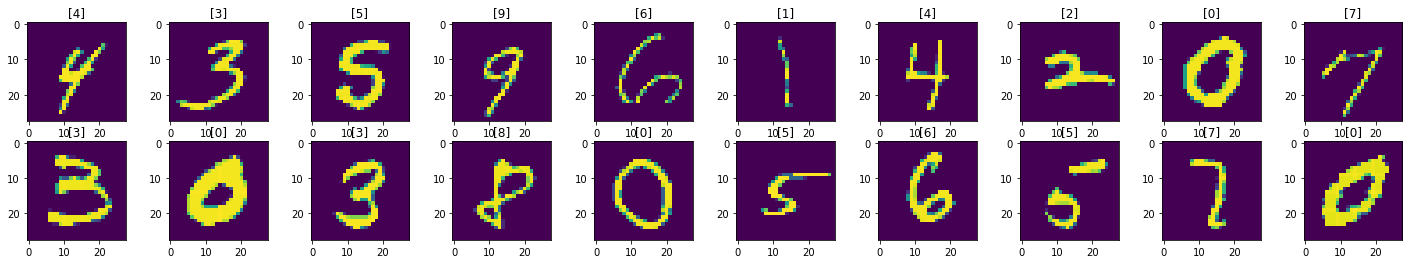

In [6]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i]))
  ax.set_title([labels[i].item()])


In [7]:
from torch import nn

In [8]:
class Classifier(nn.Module):
  def __init__(self,d_in,h1,h2,d_out):
    super().__init__()
    self.linear1 = nn.Linear(d_in,h1)
    self.linear2 = nn.Linear(h1,h2)
    self.linear3 = nn.Linear(h2,d_out)
  def forward(self,x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x  



In [9]:
model = Classifier(784,128,64,10)

In [10]:
model.parameters()

<generator object Module.parameters at 0x7fdc6f42ae08>

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001)

In [12]:
epochs = 12
running_loss_history = []
running_correct_history = []
validation_running_loss_history = []
validation_running_correct_history = []
for i in range(epochs):
  running_loss = 0.0
  running_correct = 0.0
  validation_running_loss = 0.0
  validation_running_correct = 0.0
  for inputs, labels in train_loader:
    
    inputs = inputs.view(inputs.shape[0],-1)
    outputs = model.forward(inputs)
    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    _,pred = torch.max(outputs,1)
    running_correct += torch.sum(pred == labels.data)
  else:
    with torch.no_grad():
      for val_inputs,val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0],-1)
        val_outputs = model.forward(val_inputs)
        val_loss = criterion(val_outputs,val_labels)
        validation_running_loss += val_loss.item()
        _,val_pred = torch.max(val_outputs,1)
        validation_running_correct += torch.sum(val_pred == val_labels.data)

    epoch_loss = running_loss/len(train_loader)
    epoch_accuracy = running_correct.float()/len(train_loader)
    running_loss_history.append(epoch_loss)
    running_correct_history.append(epoch_accuracy)

    val_epoch_loss = validation_running_loss/len(validation_loader)
    val_epoch_accuracy = validation_running_correct.float()/len(validation_loader)
    validation_running_loss_history.append(val_epoch_loss)
    validation_running_correct_history.append(epoch_accuracy)

    print('epoch is {}'.format(i))
    print('training_loss {:.4f}, training_accuracy {:.4f}'.format(epoch_loss, epoch_accuracy.item()))
    print('val_training_loss {:.4f}, val_training_accuracy {:.4f}'.format(val_epoch_loss, val_epoch_accuracy.item()))  

  

epoch is 0
training_loss 0.9357, training_accuracy 77.7183
val_training_loss 0.4201, val_training_accuracy 88.8500
epoch is 1
training_loss 0.3785, training_accuracy 89.3600
val_training_loss 0.3296, val_training_accuracy 90.5600
epoch is 2
training_loss 0.3185, training_accuracy 90.8533
val_training_loss 0.2920, val_training_accuracy 91.6900
epoch is 3
training_loss 0.2890, training_accuracy 91.6550
val_training_loss 0.2651, val_training_accuracy 92.2200
epoch is 4
training_loss 0.2668, training_accuracy 92.2650
val_training_loss 0.2470, val_training_accuracy 92.8500
epoch is 5
training_loss 0.2471, training_accuracy 92.8733
val_training_loss 0.2381, val_training_accuracy 93.1600
epoch is 6
training_loss 0.2305, training_accuracy 93.3517
val_training_loss 0.2175, val_training_accuracy 93.5800
epoch is 7
training_loss 0.2145, training_accuracy 93.8650
val_training_loss 0.2035, val_training_accuracy 94.0000
epoch is 8
training_loss 0.1995, training_accuracy 94.2583
val_training_loss 0.1

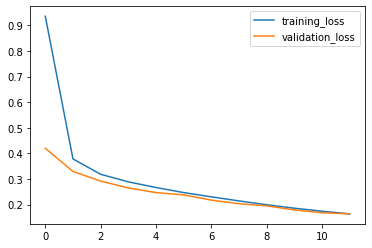

In [13]:
plt.plot(running_loss_history,label = 'training_loss')
plt.plot(validation_running_loss_history,label = 'validation_loss')
plt.legend()

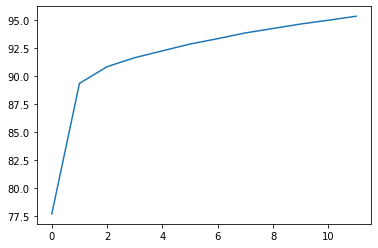

In [14]:
plt.plot(running_correct_history, label = 'training_accuracy')

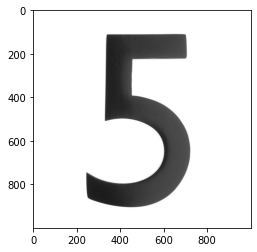

In [15]:
import requests
from PIL import Image
url = "https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg"
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)


In [16]:
import PIL.ImageOps
from PIL import ImageMath


(28, 28, 1)


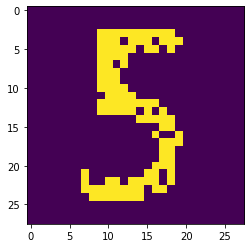

In [17]:
img = PIL.ImageOps.invert(img.convert('RGB'))
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

In [19]:
img = img.view(img.shape[0],-1)
output = model.forward(img)
_,pred = torch.max(output,1)
print(pred.item())

5
